In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt

Text(0, 0.5, 'Počet občanů')

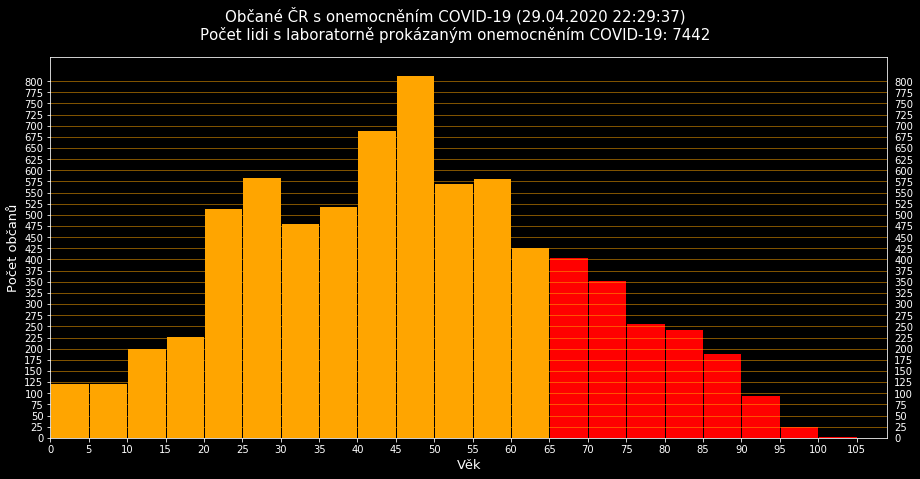

In [3]:
#Stahovani dat
data = pd.read_csv('https://onemocneni-aktualne.mzcr.cz/api/v1/covid-19/osoby.csv')

data_frame = pd.DataFrame(data, columns=['datum_hlaseni', 'vek'])
data_frame = data_frame.sort_values(by=['vek'], ascending=False)
pd.set_option('display.max_rows', data_frame.shape[0]+1)

numbers=[y for y in range(106) if y % 5 == 0]
day=datetime.now().strftime('%d.%m.%Y %H:%M:%S')
ill=len(data_frame['vek'])

#Nejpocetnejsi vyskyt
#print(Counter(data_frame['vek']).most_common(1)[0])

plt.style.use('dark_background')
plt.figure(figsize=(15,7))

#Obarveni sloupcu
n, bins, patches=plt.hist(data_frame['vek'], bins=numbers, color='orange', edgecolor='black', linewidth=1)
n_list=list(range(13,22))
try:
    new_list=[patches[i].set_fc('r') for i in n_list]
except:
    n_list.pop()
    #print(n_list)
    new_list=[patches[i].set_fc('r') for i in n_list]

plt.xticks(numbers)
plt.xlim(0, max(data_frame['vek']+5))
plt.yticks(np.arange(min(data_frame['vek']), 801, 25))
plt.tick_params(labelright=True)
plt.grid(axis='y', color='orange', linestyle='-', linewidth=.5)
plt.suptitle(f'Občané ČR s onemocněním COVID-19 ({day})\nPočet lidi s laboratorně prokázaným onemocněním COVID-19: {ill}', fontsize=15)
plt.xlabel('Věk', fontsize=13)
plt.ylabel('Počet občanů', fontsize=13)

([<matplotlib.axis.YTick at 0x6d2047f0>,
 <a list of 36 Text yticklabel objects>)

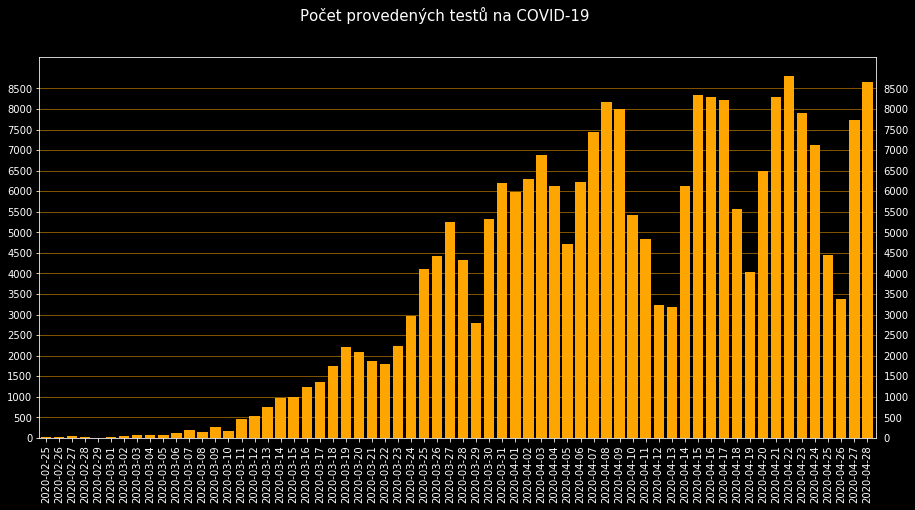

In [4]:
#Stahovani dat
data_testy=pd.read_csv('https://onemocneni-aktualne.mzcr.cz/api/v1/covid-19/testy.csv')
data_testy=pd.DataFrame(data_testy, columns=['datum','testy_den'])
m=len(data_testy['datum'])

plt.style.use('dark_background')
plt.figure(figsize=(15,7))

plt.bar(data_testy['datum'], data_testy['testy_den'], color='orange')
plt.xticks(rotation='vertical')
plt.grid(axis='y', color='orange', linestyle='-', linewidth=.5)
plt.suptitle('Počet provedených testů na COVID-19', fontsize=15)
plt.tick_params(labelright=True)
plt.xlim(+28.5, m-.3)
plt.yticks(np.arange(min(data_testy['testy_den']), max(data_testy['testy_den']+30), 500))

93
93


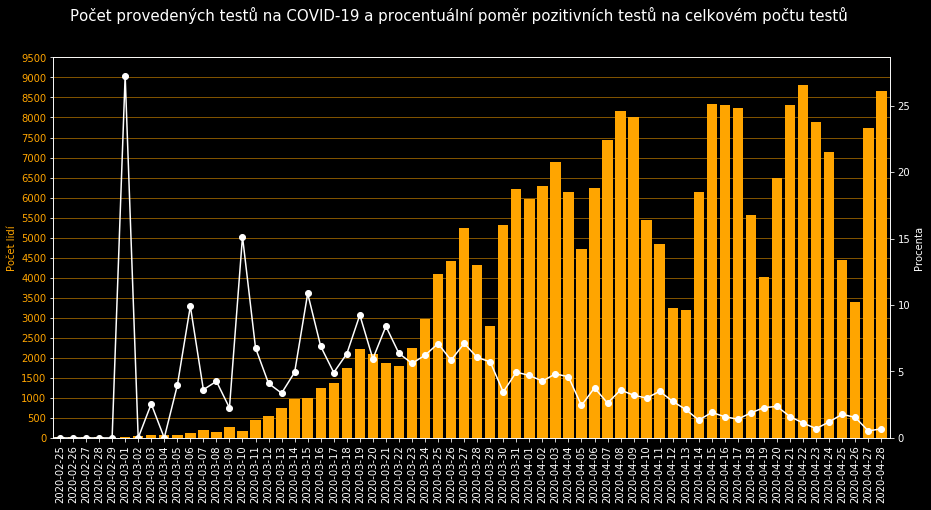

In [5]:
#Stahovani dat
data_pomer=pd.read_csv('https://onemocneni-aktualne.mzcr.cz/api/v1/covid-19/nakaza.csv')
data_pomer=pd.DataFrame(data_pomer, columns=['datum','pocet_den'])

def zero_div(n, d):
    return n/d if d else 0

#Ocisteni dat
result=[round(zero_div(data_pomer['pocet_den'][i], data_testy['testy_den'][i])*100,2) for i in range(len(data_testy['testy_den']))]
result=pd.DataFrame(result)
result=result.fillna(0)

plt.style.use('dark_background')

fig, ax1 = plt.subplots(figsize=(15,7))
fig.suptitle('Počet provedených testů na COVID-19 a procentuální poměr pozitivních testů na celkovém počtu testů', fontsize=15)

#Barový graf
ax1.set_ylabel('Počet lidí', color='orange')
ax1.bar(data_testy['datum'], data_testy['testy_den'], color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.set_xticklabels(data_testy['datum'], rotation=90)
ax1.grid(axis='y', color='orange', linestyle='-', linewidth=.5)
ax1.set_yticks(np.arange(min(data_testy['testy_den']), max(data_testy['testy_den']+1000), 500))
#ax1.set_xlim(min(data_testy['datum']),max(data_testy['datum']))
ax1.set_xlim(+28.5, m-.3)

#Spojnicový graf
ax2 = ax1.twinx()
ax2.set_ylabel('Procenta', color='white')
ax2.plot(data_pomer['datum'], result, '-ok', color='white')
ax2.tick_params(axis='y', labelcolor='white')
ax2.set_ylim(bottom=0)

print(len(data_pomer['datum']))
print(len(result))